<a href="https://colab.research.google.com/github/MarcoAPe/Data_Science_Projects/blob/main/Proyecto_M3_Modelado_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás matrices de confusión y medirás la precisión.
* Graficarás mapas de calor a partir de la matriz de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


### Lectura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%run '/content/drive/MyDrive/Colab Notebooks/MyFunctions.ipynb'

In [ ]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelado
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.svm             import SVC
from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling  import SMOTE
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import MinMaxScaler
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import mean_absolute_error
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score

In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/U-Camp/M3/Proyecto/rrhh.csv')

### Elección del modelo
El dataset es pequeño y las variables son simples de modo que el preprocesamiento aparentemente será sencillo.
1. EDA
2. Modelado


#### 1. Exploratory Data Analysis:


In [ ]:
raw.info()
# No existen datos nulos, no será necesario imputar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
raw.head()
# El tipo de dato de "describe" parece coincidir con la descripción de la columna

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
raw.Posicion.value_counts()
# Se encontró que existe mayor cantidad de posiciones en Analista.
# , así como en Posgrado y es de esperarse en este último campo dado que pocas personas llegan a ese grado.
# Se relaizará balanceo de clases por ello, más adelante.

Analista       790
Coordinador    151
Gerente         59
Name: Posicion, dtype: int64

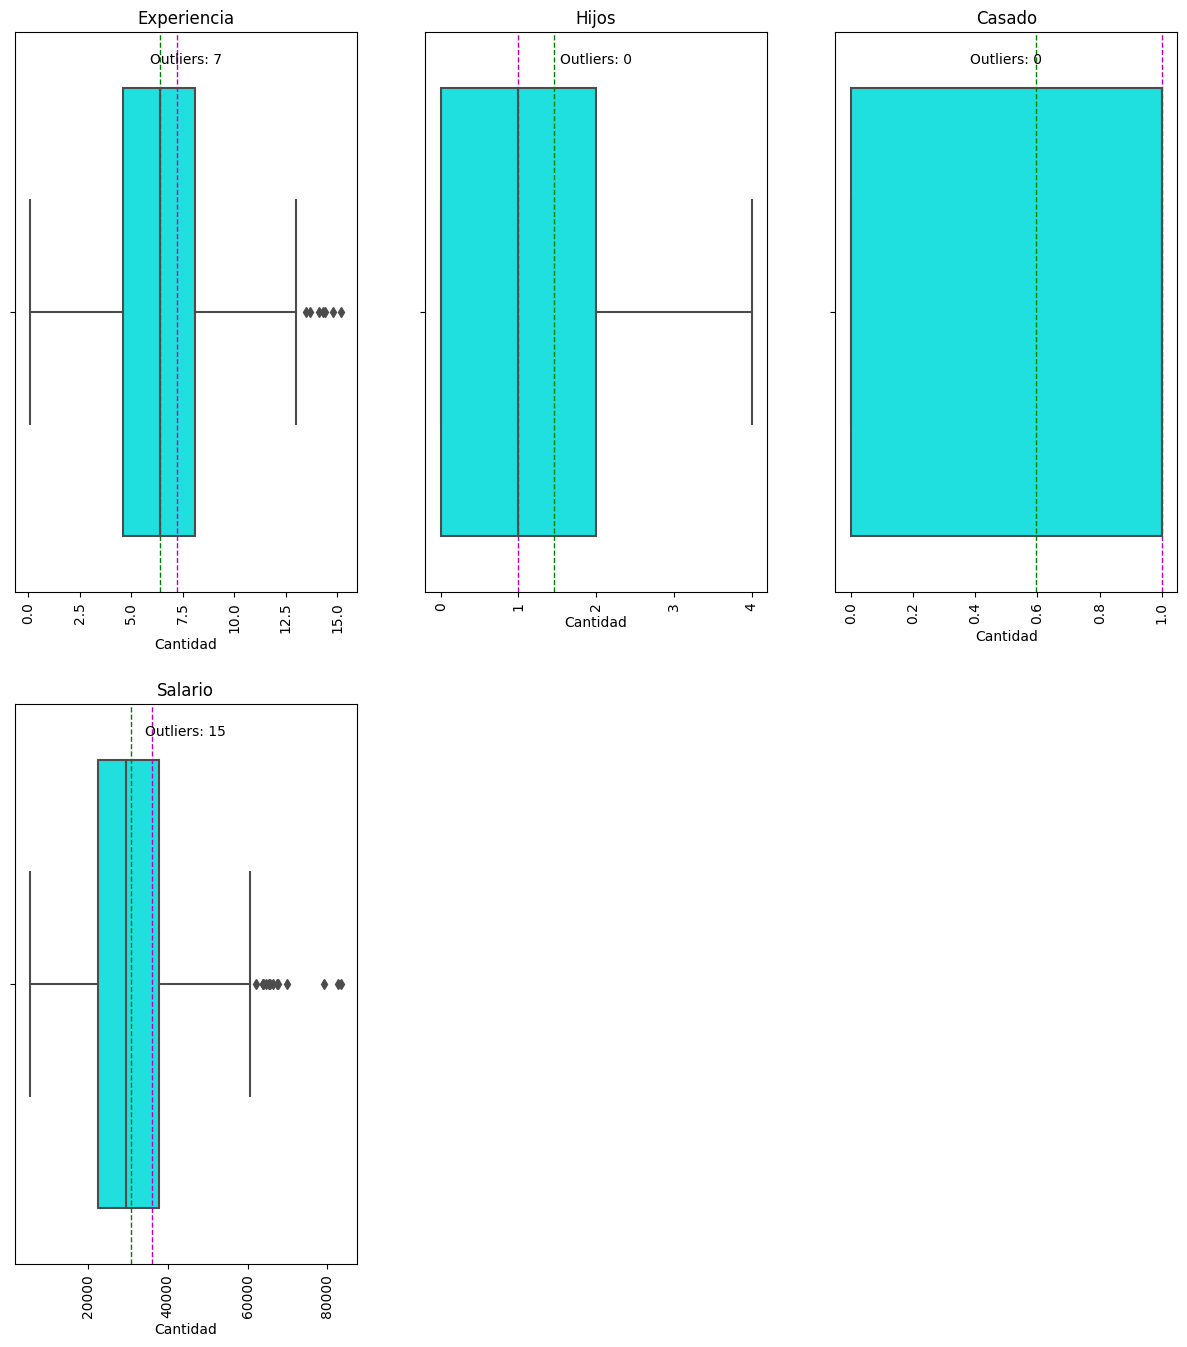

In [ ]:
Boxplot(raw)
# Existen outliers especialmente en la columna de Salario pero dado que esta variable es la objetivo no se modificarán.
# En la columna de Experiencia hay pocos outliers sin embargo también se considera un valor importante de modo que no se modificarán.

<Axes: >

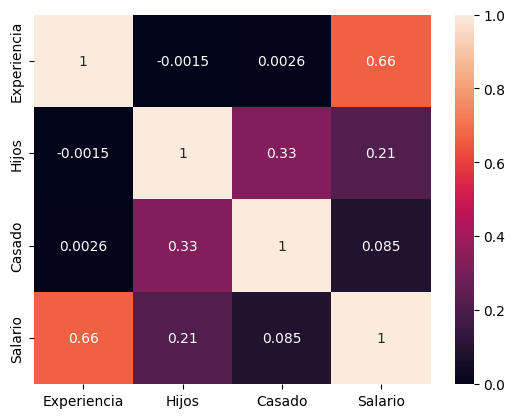

In [ ]:
sns.heatmap(data = raw.corr(), annot = True)
# Mapa de calor para visualizar colinealidad

#### 2. Modelado:


In [ ]:
x = raw.drop(columns = 'Salario')
y = raw['Salario']

In [ ]:
# Será necesario solamente transformar la columna Posición y Educación mediante dummies
x = Categoric(x,['Posicion','Educacion'],'Dummies')
x

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,1,0,0,1,0,0
1,5.6,2,0,1,0,0,0,1,0
2,11.7,1,0,1,0,0,0,1,0
3,5.2,2,1,1,0,0,0,1,0
4,7.2,2,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
995,6.0,2,1,1,0,0,1,0,0
996,6.9,1,0,1,0,0,0,1,0
997,11.4,0,0,1,0,0,0,1,0
998,9.9,2,1,1,0,0,1,0,0


In [ ]:
# Se omitirá el escalamiento de variables dado que no existe más allá de un orden de magnitud de diferencia entre el valor de cada registro.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [ ]:
modelo = LinearRegression()
modelo.fit(X = x_train, y = y_train)
df_coeficientes = pd.DataFrame({'predictor': x_train.columns,'coef': modelo.coef_.flatten()})

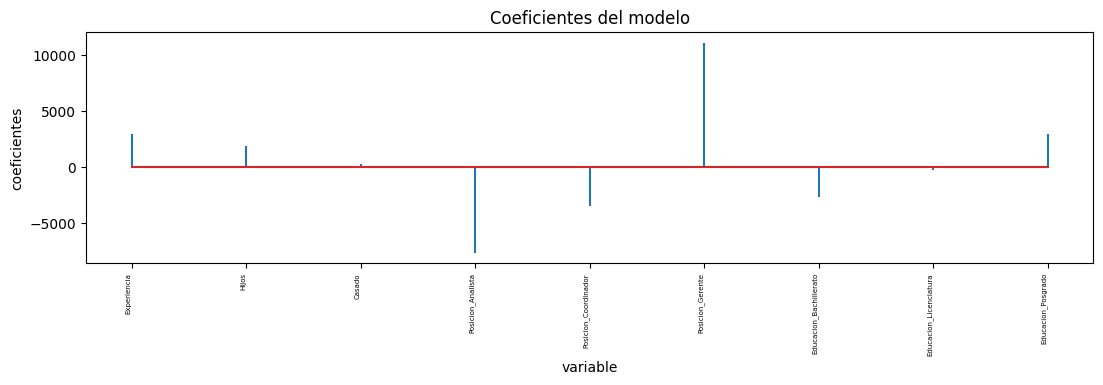

In [ ]:
fig, ax = plt.subplots(figsize=(13, 3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
predicciones = modelo.predict(x_test)
y_pred = predicciones.flatten()
comp = pd.DataFrame({'Real': y_test,'Predicción': y_pred})
comp

,Real,Predicción
131,26850,35528.844892
354,23600,22683.322764
982,44080,30936.605689
476,13990,14534.397457
491,10090,9540.266952
...,...,...
819,25880,22572.842900
0,13540,14724.674414
710,29040,36041.216058
889,26930,24602.455559


In [ ]:
R2 = modelo.score(x_test,y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f'Las métricas del modelo lineal son:\n - Coeficiente de determinación:{R2}\n - Error cuadrático medio:{mse}\n - Error absoluto medio:{mae}')

Las métricas del modelo lineal son:
 - Coeficiente de determinación:0.7395047797738383
 - Error cuadrático medio:29771565.82608608
 - Error absoluto medio:4236.376798686277


In [ ]:
modelo = PolynomialFeatures()
x_poly = modelo.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y_train)

LinearRegression()

In [ ]:
x_poly_test = modelo.transform(x_test)
y_pred = poly_reg.predict(x_poly_test)

In [ ]:
R2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f'Las métricas del modelo cuadrático son:\n - Coeficiente de determinación:{R2}\n - Error cuadrático medio:{mse}\n - Error absoluto medio:{mae}')

Las métricas del modelo cuadrático son:
 - Coeficiente de determinación:0.7288286119677923
 - Error cuadrático medio:30991727.302876674
 - Error absoluto medio:4247.347439903125


**Conclusiones:**
El modelo lineal es capaz de predecir un 73% de la variabilidad de los datos, con una diferencia media de cuatro mil doscientos pesos mexicanos ($4,200) por encima o por debajo del valor real. Considerando que el orden de magnitud de los sueldos ronda las decenas de miles esto puede presentar un problema para sueldos que sean al menos inferiores a veinte mil sin embargo presenta un error ligero en relación a cantidades mayores. Por otra parte el modelo polinomial resultante (sin grado específicado) parece tener peores métricas en todo sentido.

## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


### Lectura

In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/U-Camp/M3/Proyecto/rrhh_2.csv')

In [ ]:
raw.Contratado.value_counts()
# No es necesario resamplear dado que ambas clases están balanceadas.

1    518
0    482
Name: Contratado, dtype: int64

### Elección del modelo
El dataset es pequeño y las variables son simples de modo que el preprocesamiento aparentemente será sencillo.
1. EDA
2. Modelado

#### 1. Exploratory Data Analysis:

In [ ]:
# Ya sabemos que no existen datos faltantes ni outliers, sólo se diseñará directamente el modelo

In [ ]:
x = raw.drop(columns = 'Contratado')
y = raw['Contratado']

In [ ]:
x = Categoric(x,['Posicion','Educacion'],'Dummies')

In [ ]:
Scaler(x,'MinMax')

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.026490,1.00,1.0,0.101619,1.0,0.0,0.0,1.0,0.0,0.0
1,0.364238,0.50,0.0,0.329008,1.0,0.0,0.0,0.0,1.0,0.0
2,0.768212,0.25,0.0,0.748330,1.0,0.0,0.0,0.0,1.0,0.0
3,0.337748,0.50,1.0,0.312564,1.0,0.0,0.0,0.0,1.0,0.0
4,0.470199,0.50,1.0,0.373587,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,0.390728,0.50,1.0,0.207991,1.0,0.0,0.0,1.0,0.0,0.0
996,0.450331,0.25,0.0,0.364594,1.0,0.0,0.0,0.0,1.0,0.0
997,0.748344,0.00,0.0,0.426644,1.0,0.0,0.0,0.0,1.0,0.0
998,0.649007,0.50,1.0,0.514260,1.0,0.0,0.0,1.0,0.0,0.0


#### 2. Modelado y evaluación:



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [ ]:
smote = SMOTE(random_state=24)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [ ]:
# Definir los modelos
models = {
    'Árbol de decisión': DecisionTreeClassifier(),
    'Bosque aleatorio': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Regresión logística': LogisticRegression(),
    'K-Vecinos más cercanos': KNeighborsClassifier()
}# Entrenar y evaluar los modelos
results = {'Modelo': [], 'Precisión': [], 'Recall': [], 'F1-score': []}

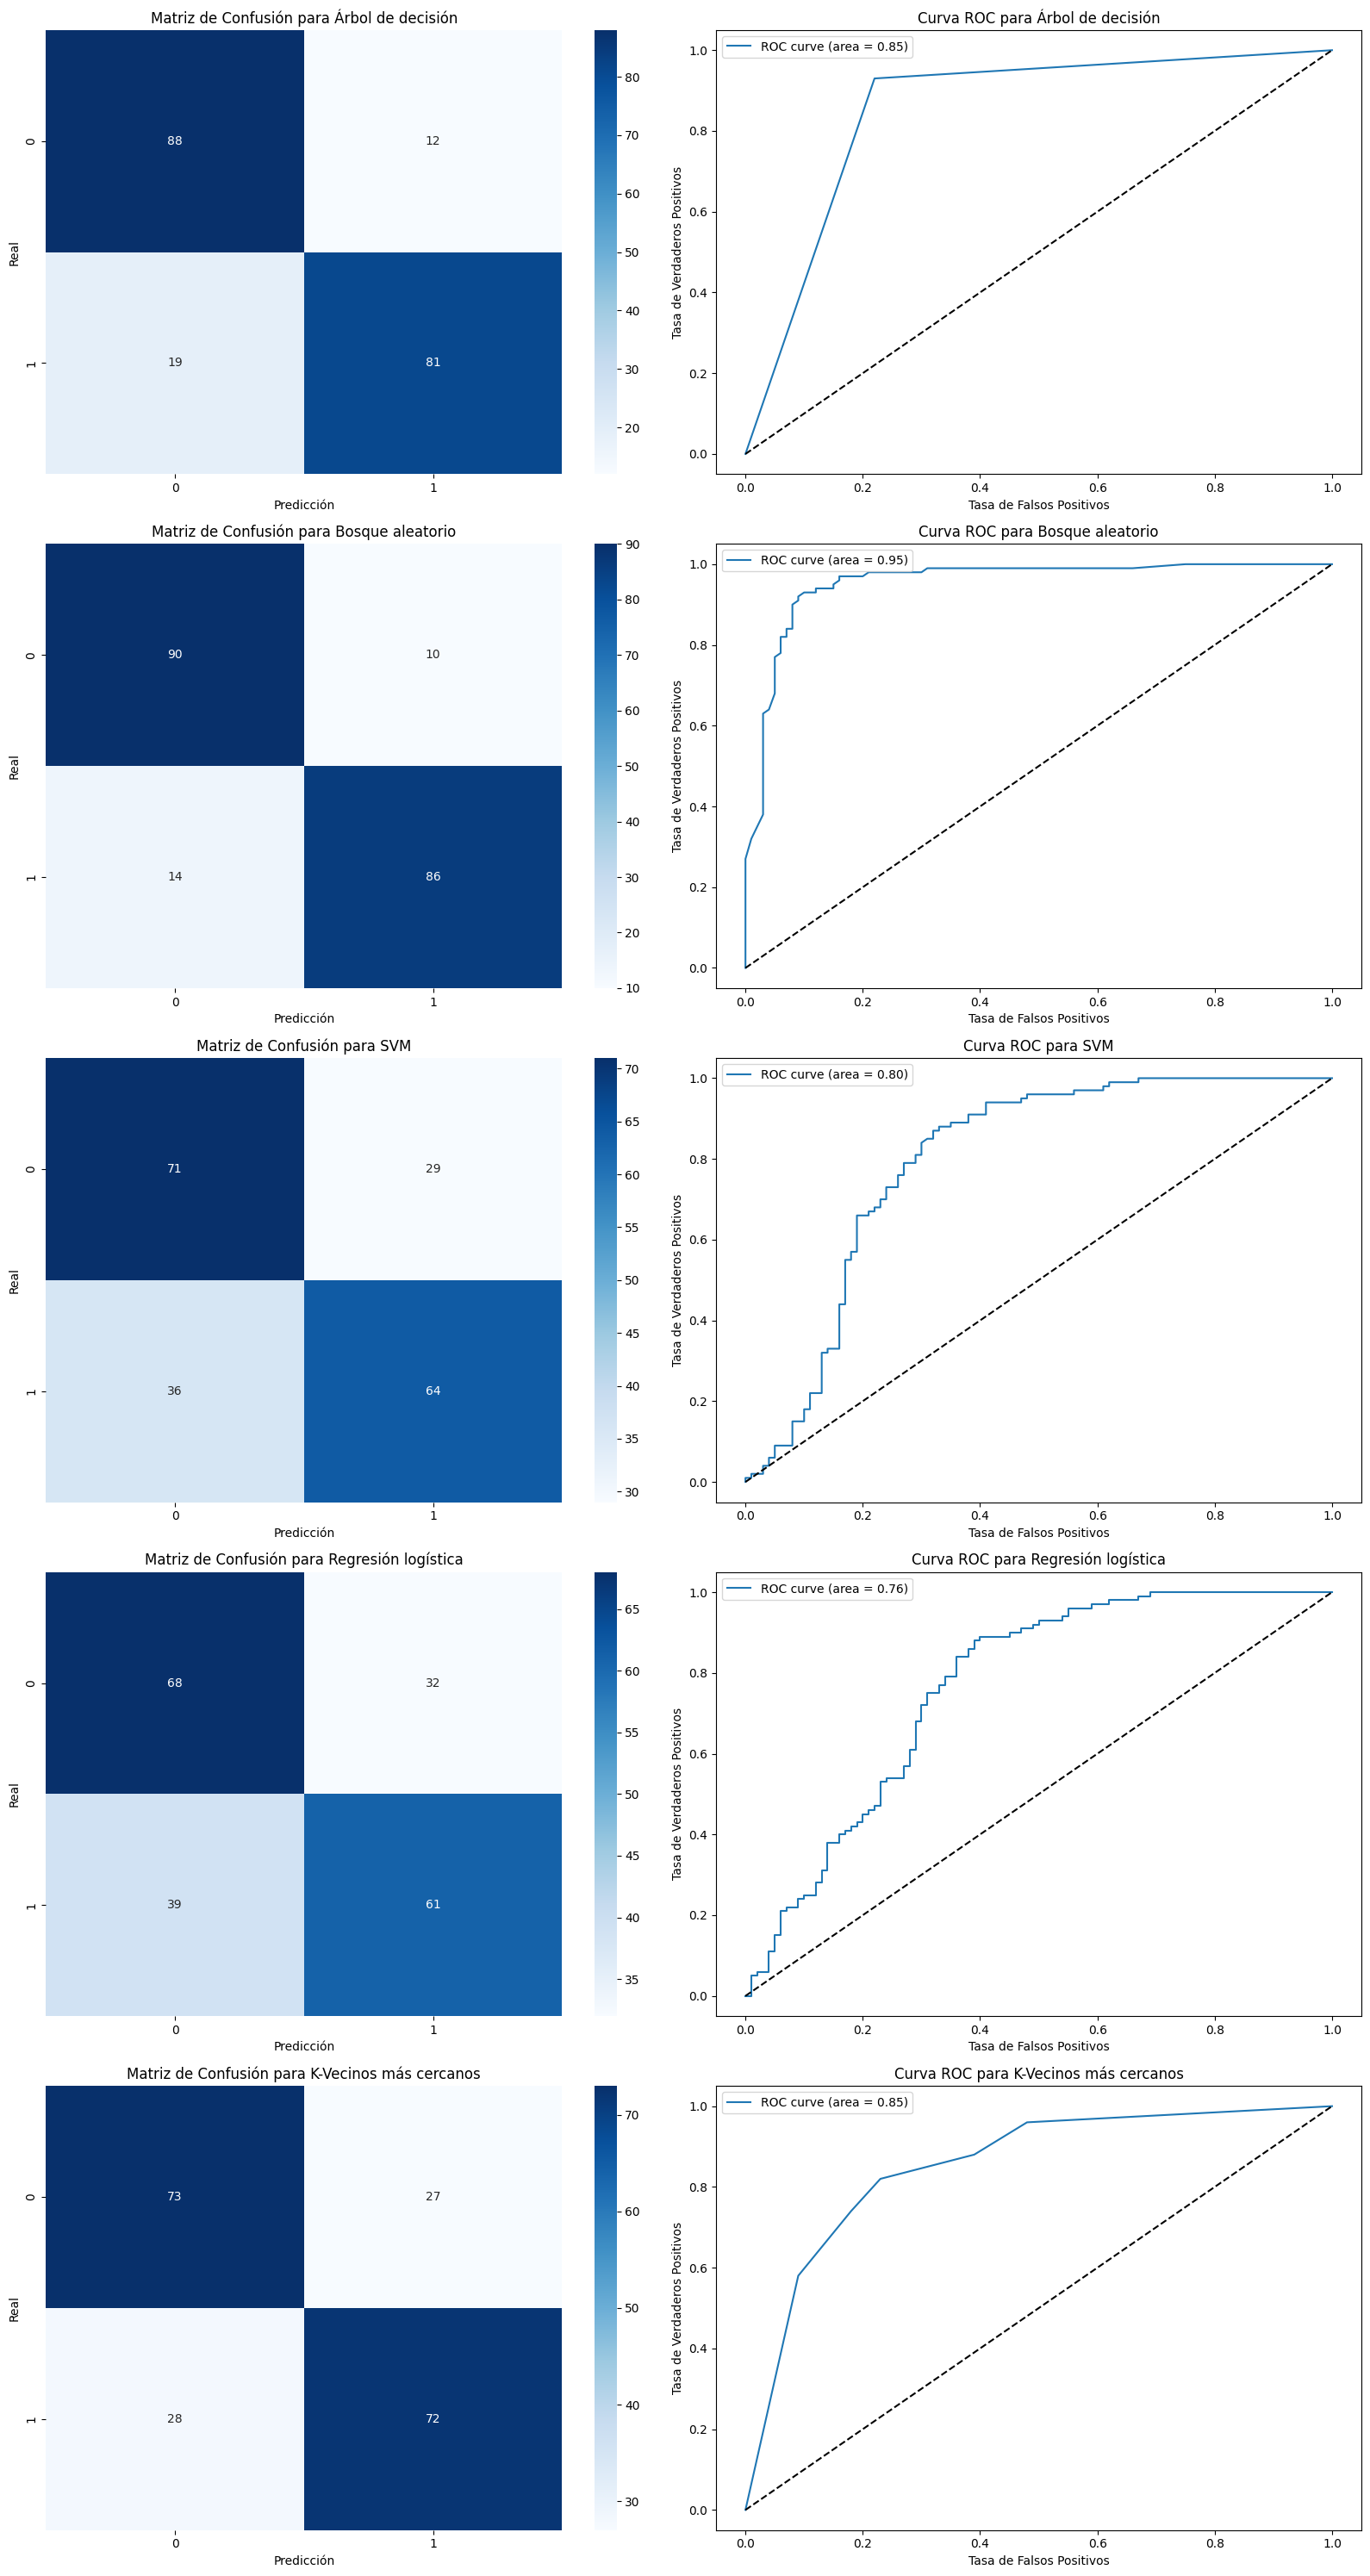

In [ ]:
# Crear subplots para organizar las gráficas
fig, axs = plt.subplots(len(models), 2, figsize=(16, len(models) * 6))

# Iterar sobre los modelos
for i, (model_name, model) in enumerate(models.items()):
    # Entrenar el modelo
    model.fit(x_train_balanced, y_train_balanced)

    # Predecir con validación cruzada
    y_pred = cross_val_predict(model, x_test, y_test, cv=5)

    # Calcular métricas de evaluación
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar los resultados
    results['Modelo'].append(model_name)
    results['Precisión'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)

    # Mostrar la matriz de confusión en el primer subplot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axs[i, 0])
    axs[i, 0].set_xlabel('Predicción')
    axs[i, 0].set_ylabel('Real')
    axs[i, 0].set_title('Matriz de Confusión para ' + model_name)

    # Mostrar la curva ROC en el segundo subplot
    y_scores = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    axs[i, 1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[i, 1].plot([0, 1], [0, 1], 'k--')
    axs[i, 1].set_xlabel('Tasa de Falsos Positivos')
    axs[i, 1].set_ylabel('Tasa de Verdaderos Positivos')
    axs[i, 1].set_title('Curva ROC para ' + model_name)
    axs[i, 1].legend(loc='best')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
pd.DataFrame(results)

,Modelo,Precisión,Recall,F1-score
0,Árbol de decisión,0.870968,0.81,0.839378
1,Bosque aleatorio,0.895833,0.86,0.877551
2,SVM,0.688172,0.64,0.663212
3,Regresión logística,0.655914,0.61,0.632124
4,K-Vecinos más cercanos,0.727273,0.72,0.723618


**Conclusiones:**
Considerando la perspectiva de un empleado, ambos escenarios: creerse contratado y no estarlo, y no saberse contratado y estarlo, pueden ser igualmente perjudiciales dado que puede estar en una situación difícil y realizar modificaciones en su vida a partir de este suceso, así como perder una importante oportunidad y además bien merecida, respectivamente.

Por otra parte, una empresa que evalue estos criterios podría decidir que un postulante contratado conlleve una inversión importante, de modo que hacer estos movimientos fiscales y administrativos consume recursos, así que éste es el peor escenario posible: que alguien se prediga contratado mientras que no lo esté en realidad.

En ambos casos el mejor modelo de predicción construido es el bosque aleatorio dada su matriz de confusión con valores relativamente bajos en las esquinas de falso positivo y falso negativo, así como en su curva ROC.